In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stopword = stopwords.words('english')
stopword.pop(stopword.index('against'))
stopword.pop(stopword.index('not'))
stopword.pop(stopword.index('haven\'t'))
stopword.pop(stopword.index('more'))
stopword.pop(stopword.index('most'))
stopword.pop(stopword.index('own'))
stopword.pop(stopword.index('very'))
stopword.append('\'m')
stopword.append('agent')
stopword.append('client')
stopword.append('\'re')
stopword.append('n')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [6]:
import re
from nltk.stem import WordNetLemmatizer
ps = WordNetLemmatizer()
file = open('positivefinal (3).txt','r')
f = file.readlines()
review = []
for word in f:
    word = re.sub('[^a-z,A-Z0-9]',' ',word)
    review.append(word)
review = [ps.lemmatize(word) for word in review if not word in stopword]
len(review)

104

In [1]:
import numpy as np
import pandas as pd
a = np.ones(104)
dataset = pd.DataFrame({"word":review,"sentiment":a})
dataset.to_csv('try.csv',mode = "a",header = False,index = False)

NameError: name 'review' is not defined

In [1]:
import pandas as pd
df = pd.read_csv("try.csv",header = None)
df.columns = ["word","sentiment"]
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(df["word"])
vector = vectorizer.transform(df["word"])
 
# Summarizing the Encoded Texts
print("Encoded Document is:")
x = vector.toarray()
x

Encoded Document is:


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
x.shape

(195, 221)

In [62]:
import pandas as pd
df1 = pd.read_csv("myDataset.csv")
df1.columns = ["sentiment","file","lines"]

In [63]:
len(df1)

23788

In [64]:
import re
from nltk.stem import WordNetLemmatizer
ps = WordNetLemmatizer()
corpus = []
for i in range(0,len(df1)):
    review = re.sub('[^a-z,A-Z0-9]',' ',str(df1['lines'][i]))
    review = review.lower()
    review = review.split()
    review = [ps.lemmatize(word) for word in review if not word in stopword]
    review = ' '.join(review)
    corpus.append(review)
corpus

['mail box belonging 551 486 5969 full cannot accept new message time please try later good bye',
 'sorry, person called voicemail box not set yet , goodbye mailbox',
 'call forwarded automate , voice messaging system 732735622 , seven not available tone please record message finished recording may hang press one more option',
 'please leave message 609 510 1585 , nothing recorded record message tone simply hang done delivery option press',
 'hello hi, name jason calling behalf optimum let know call monitored recorded quality assurance mr christopher thomas , yes, , hi, sir , mean, expect , call sir swiped , brief stuff sir say loyal , often customer correct , alright, sir, well most people spending lot more time home relying internet service want improve internet experience sir, like exactly , say currently qualify go one gigabyte internet upgrade make upload download speed 10 time faster currently right sir let ask thing family like , interested complete , mobile device like bundle s

In [65]:
len(corpus)

23788

In [66]:
X_test = vectorizer.transform(corpus)

In [67]:
X_test = X_test.toarray()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
from numpy import savetxt
savetxt('vector.csv',X_test,delimiter = ',')

In [20]:
y_pred

array([0., 0., 1., ..., 1., 1., 1.])

In [21]:
len(y_pred)

23788

0.6229191188834706


C:\Users\CU696Aliasgar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

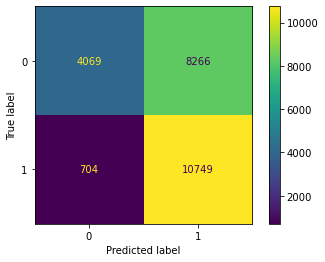

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print(accuracy_score(df1['sentiment'],y_pred))
plot_confusion_matrix(c,X_test,df1['sentiment'])
plt.show

In [82]:
x_train = X_test[:20000]
x_test = X_test[20000:23788]
y_train = df1['sentiment'].iloc[:20000]
y_test = df1['sentiment'].iloc[20000:23788]

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 10)]

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_G = RandomizedSearchCV(rf,parameters,cv = 5)

In [84]:
rf_G.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [500, 555, 611, 666,
                                                         722, 777, 833, 888,
                                                         944, 1000]})

In [85]:
rf_G.best_params_

{'n_estimators': 555,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': True}

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators = 555,min_samples_split = 5,min_samples_leaf = 1,max_features = 'log2',max_depth = 50,bootstrap = True)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=50, max_features='log2', min_samples_split=5,
                       n_estimators=555)

[[1551  407]
 [ 173 1657]]
0.8468848996832101


C:\Users\CU696Aliasgar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

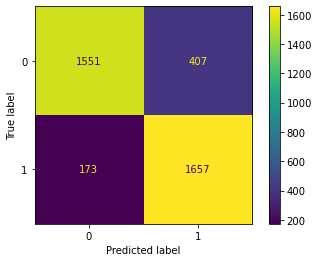

In [88]:
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
plot_confusion_matrix(rf,x_test,y_test)
plt.show

In [44]:
o = vectorizer.vocabulary_.keys()
z=[]
for word in o:
    z.append(word)
z

['absurd',
 'abysmal',
 'awful',
 'terrible',
 'horrible',
 'pathetic',
 'angry',
 'upset',
 'annoying',
 'annoyed',
 'annoy',
 'ridiculous',
 'useless',
 'disgusting',
 'piss',
 'pissing',
 'pissed',
 'crap',
 'screw',
 'headache',
 'heck',
 'hell',
 'nonsense',
 'shit',
 'bullshit',
 'suck',
 'sucks',
 'cheap',
 'nuts',
 'frustrating',
 'frustated',
 'frustration',
 'fuck',
 'fucking',
 'mad',
 'ass',
 'bitch',
 'stupid',
 'idiot',
 'dammit',
 'goddamnit',
 'bad',
 'worst',
 'worse',
 'not',
 'good',
 'poor',
 'irritate',
 'irritating',
 'freaking',
 'shut',
 'for',
 'nothing',
 'motherfucker',
 'fucker',
 'trash',
 'insult',
 'lethargic',
 'unhappy',
 'asshole',
 'unacceptable',
 'acceptable',
 'satisfied',
 'dissatisfied',
 'dissatisfaction',
 'dissappointed',
 'unbelievable',
 'dumb',
 'vicious',
 'moron',
 'morons',
 'vulgar',
 'creep',
 'liers',
 'liars',
 'cheat',
 'cheating',
 'cheaters',
 'fraud',
 'scam',
 'legit',
 'illegit',
 'fake',
 'nightmare',
 'outrageous',
 'rude',
 

In [89]:
words = []
k = 0

for text in df1['lines'].values:
    
    l=[]
    #print(type(text))
    words = text.split(' ')
    for w in words:
         if w in z:
                print(w)
                l.append(w)
    s = " ".join(l)
    try:
         df1['lines'][k] = s
    except:
         print(s)
    k = k+1
df1

good


C:\Users\CU696Aliasgar\AppData\Local\Temp\ipykernel_4180\2282105062.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['lines'][k] = s


not
not
for
for
for
for
know
for
for
voice
not
for
not
not
not
for
know
know
wonderful
hear
mind
for
know
great
for
great
know
for
help
best
for
for
great
for
for
for
for
for
for
for
for
for
great
for
not
for
for
appreciate
not
good
for
appreciate
for
for
for
for
for
great
happy
for
for
for
not
for
best
mind
not
for
for
best
for
great
voice
not
for
not
not
bad
good
know
for
know
not
sucks
voice
not
voice
not
for
know
not
for
good
for
for
for
for
help
not
help
for
for
wonderful
for
for
not
help
for
hear
good
good
for
help
nice
for
not
for
for
for
stopped
not
not
for
hate
for
for
for
great
for
not
not
great
know
great
for
not
for
for
for
for
not
nothing
for
not
great
voice
not
for
not
not
bad
not
not
for
not
for
nice
for
know
really
not
for
know
for
best
for
not
know
glad
not
know
not
for
not
not
for
voice
not
not
for
hear
hear
for
know
for
very
for
for
not
know
not
know
for
for
for
great
pretty
good
not
for
for
for
voice
not
for
for
for
for
for
for
great
for
for
love
great
for
appreciat

sentiment        file  \
0              0  c61198200.   
1              0  c61198218.   
2              0  c61198222.   
3              0  c61198242.   
4              1  c61198246.   
...          ...         ...   
23783          1  g22539867.   
23784          1  g22539868.   
23785          0  g22539870.   
23786          0  g22539871.   
23787          1  g22539874.   

                                                   lines  
0                                                   good  
1                                                    not  
2                                                not for  
3                                                for for  
4                                       for know for for  
...                                                  ...  
23783                                                     
23784  know for great for for mind for for great for ...  
23785         for for for not for glad hear know for for  
23786         for for for not for glad hear know for for  
23787  know good great for mind very very know for kn...  

[23788 rows x 3 columns]

In [46]:
df1

sentiment        file  \
0              0  c61198200.   
1              0  c61198218.   
2              0  c61198222.   
3              0  c61198242.   
4              1  c61198246.   
...          ...         ...   
23783          1  g22539867.   
23784          1  g22539868.   
23785          0  g22539870.   
23786          0  g22539871.   
23787          1  g22539874.   

                                                   lines  
0                                                to good  
1                                   the you that not you  
2                            to not the you you for more  
3                                            for the for  
4      my for you to you know for to to that the that...  
...                                                  ...  
23783                                                     
23784  so you know for you great my for the to for th...  
23785  for the to my me you to for for the not more s...  
23786  for the to my me you to for for the not more s...  
23787  so you know the you good great thanks for you ...  

[23788 rows x 3 columns]

In [53]:
z = ['absurd',
 'abysmal',
 'awful',
 'terrible',
 'horrible',
 'pathetic',
 'angry',
 'upset',
 'annoying',
 'annoyed',
 'annoy',
 'ridiculous',
 'useless',
 'disgusting',
 'piss',
 'pissing',
 'pissed',
 'crap',
 'screw',
 'headache',
 'heck',
 'hell',
 'nonsense',
 'shit',
 'bullshit',
 'suck',
 'sucks',
 'cheap',
 'nuts',
 'frustrating',
 'frustated',
 'frustration',
 'fuck',
 'fucking',
 'mad',
 'ass',
 'bitch',
 'stupid',
 'idiot',
 'dammit',
 'goddamnit',
 'bad',
 'worst',
 'worse',
 'not good',
 'poor',
 'irritate',
 'irritating',
 'freaking',
 'shut',
 'for nothing',
 'motherfucker',
 'fucker',
 'trash',
 'insult',
 'lethargic',
 'unhappy',
 'asshole',
 'unacceptable',
 'acceptable',
 'satisfied',
 'dissatisfied',
 'dissatisfaction',
 'dissappointed',
 'unbelievable',
 'dumb',
 'vicious',
 'moron',
 'morons',
 'vulgar',
 'creep',
 'liers',
 'liars',
 'cheat',
 'cheating',
 'cheaters',
 'fraud',
 'scam',
 'legit',
 'illegit',
 'fake',
 'nightmare',
 'outrageous',
 'rude',
 'waste',
 'hate',
 'disappointed',
 'retarded',
 'disappointment',
 'illegal',
 'unprofessional',
 'talk to supervisor',
 'need manager',
 'arrogant',
 'arrogance',
 'helping',
 'resolved',
 'no resolution',
 'help',
 'didn\'tworking',
 'stops',
 'stopped',
 'thank you so much',
 'thanks lot',
 'glad',
 'appreciate',
 'appreciated',
 'lovely',
 'loved it',
 'loving',
 'amazing',
 'amazed',
 'awesome',
 'fantastic',
 'happy',
 'happier',
 'happiest',
 'wonderful',
 'generous',
 'charming',
 'enjoy',
 'enjoyed',
 'enjoying',
 'liked',
 'excellent',
 'super',
 'superb',
 'pleased',
 'grateful',
 'greatful',
 'really',
 'helpful',
 'very fabulous',
 'know',
 'hear',
 'great',
 'made my day',
 'life',
 'job easy cool',
 'pretty',
 'love',
 'sounds like plan',
 'beautiful',
 'that news handsome',
 'gorgeous works',
 'nice',
 'voice',
 'melodious',
 'splendid',
 'terrific',
 'magnificient',
 'marvelous',
 'first class',
 'brilliant',
 'superior',
 'impressive',
 'divine',
 'tremendous',
 'peerless',
 'more than expected',
 'exceeded the expectations',
 'stunning',
 'remarkable',
 'dazzling',
 'best',
 'noble',
 'elegant',
 'spectacular',
 'fab',
 'incredible',
 'phenomenal',
 'proud',
 'glorious',
 'outstanding',
 'extraordinary',
 'noteworthy',
 'astonishing',
 'delightful',
 'delighted',
 'mind',
 'blowing',
 'groovy',
 'exciting',
 'eye opening',
 'amusing',
 'attractive',
 'ravishing',
 'appealing',
 'promising',
 'lucky me',
 'feeling neat',
 'trendy']

In [55]:
vocab = []
for w in z:
    ps.lemmatize(w)
    if w not in stopword:
        vocab.append(w)
vocab

['absurd',
 'abysmal',
 'awful',
 'terrible',
 'horrible',
 'pathetic',
 'angry',
 'upset',
 'annoying',
 'annoyed',
 'annoy',
 'ridiculous',
 'useless',
 'disgusting',
 'piss',
 'pissing',
 'pissed',
 'crap',
 'screw',
 'headache',
 'heck',
 'hell',
 'nonsense',
 'shit',
 'bullshit',
 'suck',
 'sucks',
 'cheap',
 'nuts',
 'frustrating',
 'frustated',
 'frustration',
 'fuck',
 'fucking',
 'mad',
 'ass',
 'bitch',
 'stupid',
 'idiot',
 'dammit',
 'goddamnit',
 'bad',
 'worst',
 'worse',
 'not',
 'good',
 'poor',
 'irritate',
 'irritating',
 'freaking',
 'shut',
 'nothing',
 'motherfucker',
 'fucker',
 'trash',
 'insult',
 'lethargic',
 'unhappy',
 'asshole',
 'unacceptable',
 'acceptable',
 'satisfied',
 'dissatisfied',
 'dissatisfaction',
 'dissappointed',
 'unbelievable',
 'dumb',
 'vicious',
 'moron',
 'morons',
 'vulgar',
 'creep',
 'liers',
 'liars',
 'cheat',
 'cheating',
 'cheaters',
 'fraud',
 'scam',
 'legit',
 'illegit',
 'fake',
 'nightmare',
 'outrageous',
 'rude',
 'waste',

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(vocab)
vector = vectorizer.transform(vocab)

In [57]:
print("Encoded Document is:")
x = vector.toarray()
x

Encoded Document is:


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#Using TFIDF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df["word"]).toarray()
x_test = tfidf.transform(corpus)

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2500, num = 10)]

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_G = RandomizedSearchCV(rf,parameters,cv = 5)

In [70]:
rf_G.fit(x,df['sentiment'])

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [500, 722, 944, 1166,
                                                         1388, 1611, 1833, 2055,
                                                         2277, 2500]})

In [71]:
rf_G.best_params_

{'n_estimators': 2500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': True}

[[105  12]
 [ 48  57]]


C:\Users\CU696Aliasgar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7297297297297297


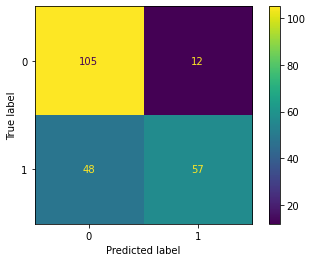

In [74]:
rftf = RandomForestClassifier(n_estimators= 2500,min_samples_split= 5,min_samples_leaf= 1,max_features= 'log2',max_depth= 80,bootstrap= True)
rftf.fit(x,df['sentiment'])
y_predrf = rftf.predict(x_test)
print(confusion_matrix(df1['sentiment'],y_predrf))
plot_confusion_matrix(rftf,x_test,df1['sentiment'])
print(accuracy_score(df1['sentiment'],y_predrf))

In [53]:
rfnb = GaussianNB()
rfnb.fit(x,df['sentiment'])
y_predrf = rfnb.predict(X_test)
print(confusion_matrix(df1['sentiment'],y_predrf))
print(accuracy_score(df1['sentiment'],y_predrf))

[[35 82]
 [ 7 98]]
0.5990990990990991
